In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [17]:

# sestav path k datum pro python i jupyter
try:
    base_dir = os.path.dirname(os.path.abspath(__file__))  # Python script
except NameError:
    base_dir = os.getcwd()  # Jupyter

# cesta k datum
data_path = os.path.abspath(os.path.join(base_dir, '.', 'data', 'data_mall_customers.csv'))

# 1. Načtení datasetu
data = pd.read_csv(data_path)

In [18]:

# 2. Výběr relevantních proměnných
# Používáme nové názvy sloupců: 'annual_income' a 'spending_score'
X = data[['annual_income', 'spending_score']]


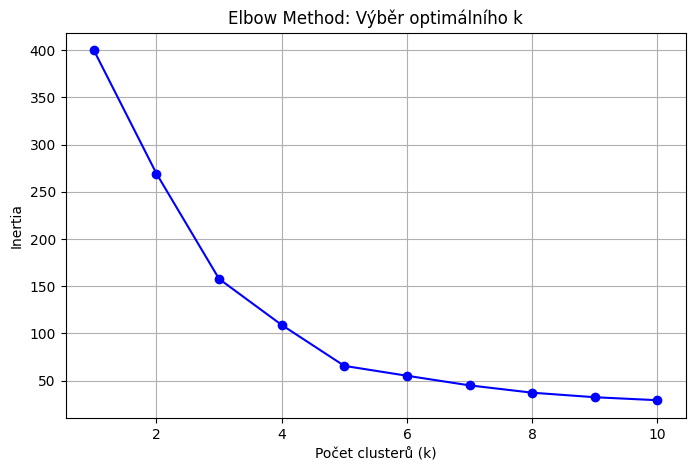

In [19]:
# 3. Standardizace dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow Method - Volba optimálního počtu clusterů
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Vykreslení Elbow grafu
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Počet clusterů (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Výběr optimálního k')
plt.grid(True)
plt.show()

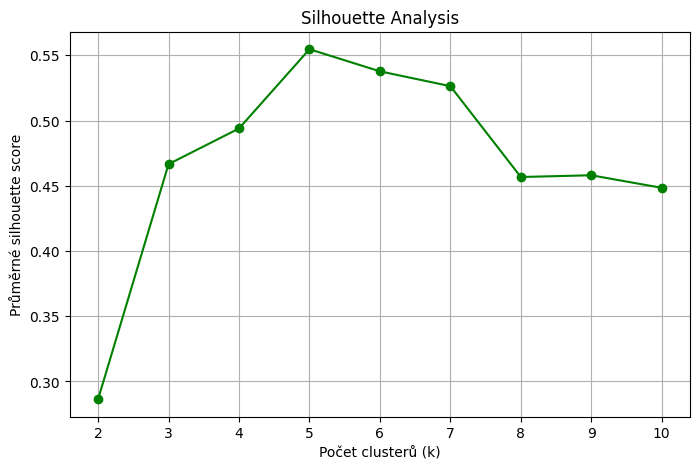

In [20]:
# 5. Silhouette Analysis
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Vykreslení Silhouette grafu
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Počet clusterů (k)')
plt.ylabel('Průměrné silhouette score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

In [21]:
# 6. Fitování finálního modelu (například k=5 podle běžných výsledků)
kmeans_final = KMeans(n_clusters=5, n_init=10, random_state=0)
clusters = kmeans_final.fit_predict(X_scaled)


In [22]:

# 7. Přidání clusterů do původního datasetu
data['cluster'] = clusters


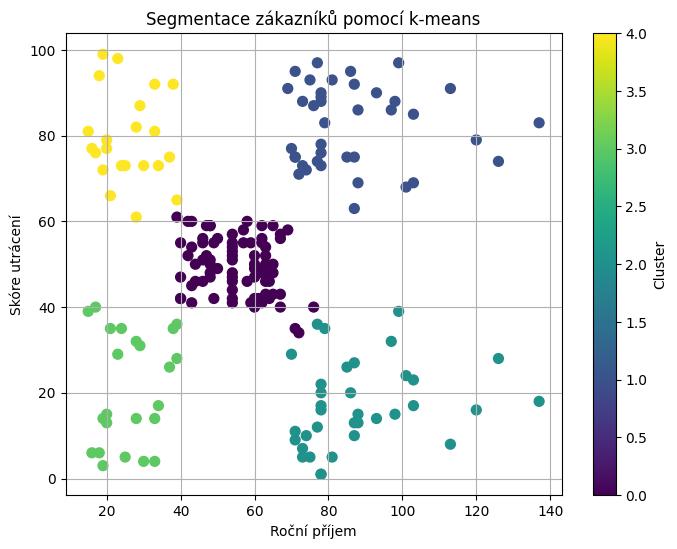

In [23]:
# 8. Vizualizace výsledků
plt.figure(figsize=(8, 6))
plt.scatter(data['annual_income'], data['spending_score'],
            c=data['cluster'], cmap='viridis', s=50)
plt.title('Segmentace zákazníků pomocí k-means')
plt.xlabel('Roční příjem')
plt.ylabel('Skóre utrácení')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [24]:
# 9. Shrnutí – průměrné hodnoty v jednotlivých clusterech
summary = data
print(summary)

     customer_id  gender  age  annual_income  spending_score  cluster
0              1    Male   19             15              39        3
1              2    Male   21             15              81        4
2              3  Female   20             16               6        3
3              4  Female   23             16              77        4
4              5  Female   31             17              40        3
..           ...     ...  ...            ...             ...      ...
195          196  Female   35            120              79        1
196          197  Female   45            126              28        2
197          198    Male   32            126              74        1
198          199    Male   32            137              18        2
199          200    Male   30            137              83        1

[200 rows x 6 columns]
